In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("data/design-matrix.csv", parse_dates=["formation_datetime"])
df.tail(20)

,code,name,formation_datetime,formation_lat,formation_lon,ACE,rhum_minus_0_days,rhum_minus_3_days,rhum_minus_7_days,rhum_minus_14_days,sst_minus_0_days,sst_minus_3_days,sst_minus_7_days,sst_minus_14_days,vws_minus_0_days,vws_minus_3_days,vws_minus_7_days,vws_minus_14_days
1971,AL202023,TAMMY,2023-10-18 18:00:00,12.9,309.0,18.5550,44.25,14.25,17.00,25.25,30.090000,30.090000,29.869999,29.929998,5.283525,9.495427,8.101002,17.691877
1972,AL212023,TWENTY-ONE,2023-10-23 12:00:00,11.4,277.4,0.0000,70.25,60.25,88.50,69.00,30.490000,30.510000,30.769999,30.799999,6.204284,1.984473,4.553708,1.736555
1973,AL012024,ALBERTO,2024-06-17 18:00:00,19.9,267.3,1.8700,67.50,58.75,22.50,40.25,30.340000,30.179998,29.849998,29.900000,12.362140,5.015041,1.243483,24.492166
1974,AL022024,BERYL,2024-06-28 12:00:00,8.9,320.4,39.2775,61.00,58.25,31.75,16.75,28.619999,28.330000,28.799999,28.629999,10.095945,7.224999,1.089151,5.097549
1975,AL032024,CHRIS,2024-06-30 18:00:00,19.7,264.6,0.2825,69.50,66.75,73.75,33.25,29.840000,29.869999,30.139999,30.109999,7.277104,11.728223,7.877183,13.789717
1976,AL042024,DEBBY,2024-08-02 12:00:00,20.4,284.2,5.6725,45.50,20.75,55.00,39.25,NaN,NaN,NaN,NaN,1.274755,12.851704,25.852043,13.713682
1977,AL052024,ERNESTO,2024-08-11 18:00:00,14.4,312.8,16.2575,26.00,30.50,42.75,10.25,28.459999,28.469999,28.109999,27.980000,7.376525,11.530069,3.925319,3.016726
1978,AL062024,FRANCINE,2024-09-08 18:00:00,21.4,265.5,6.1975,53.25,65.50,41.25,25.25,31.480000,31.679998,31.449999,31.039999,3.341126,13.589379,1.818309,7.423484
1979,AL072024,GORDON,2024-09-11 12:00:00,15.7,332.1,1.2525,51.75,31.75,77.75,42.00,28.369999,28.490000,28.330000,27.900000,5.038972,10.432762,11.032283,6.093285
1980,AL092024,HELENE,2024-09-23 12:00:00,17.2,278.3,10.3775,88.25,36.25,33.25,40.25,29.750000,30.080000,30.400000,29.869999,10.390651,17.405242,5.280683,22.450642


In [18]:
df['year'] = df['code'].str[-4:]
df.year = df.year.astype(int)

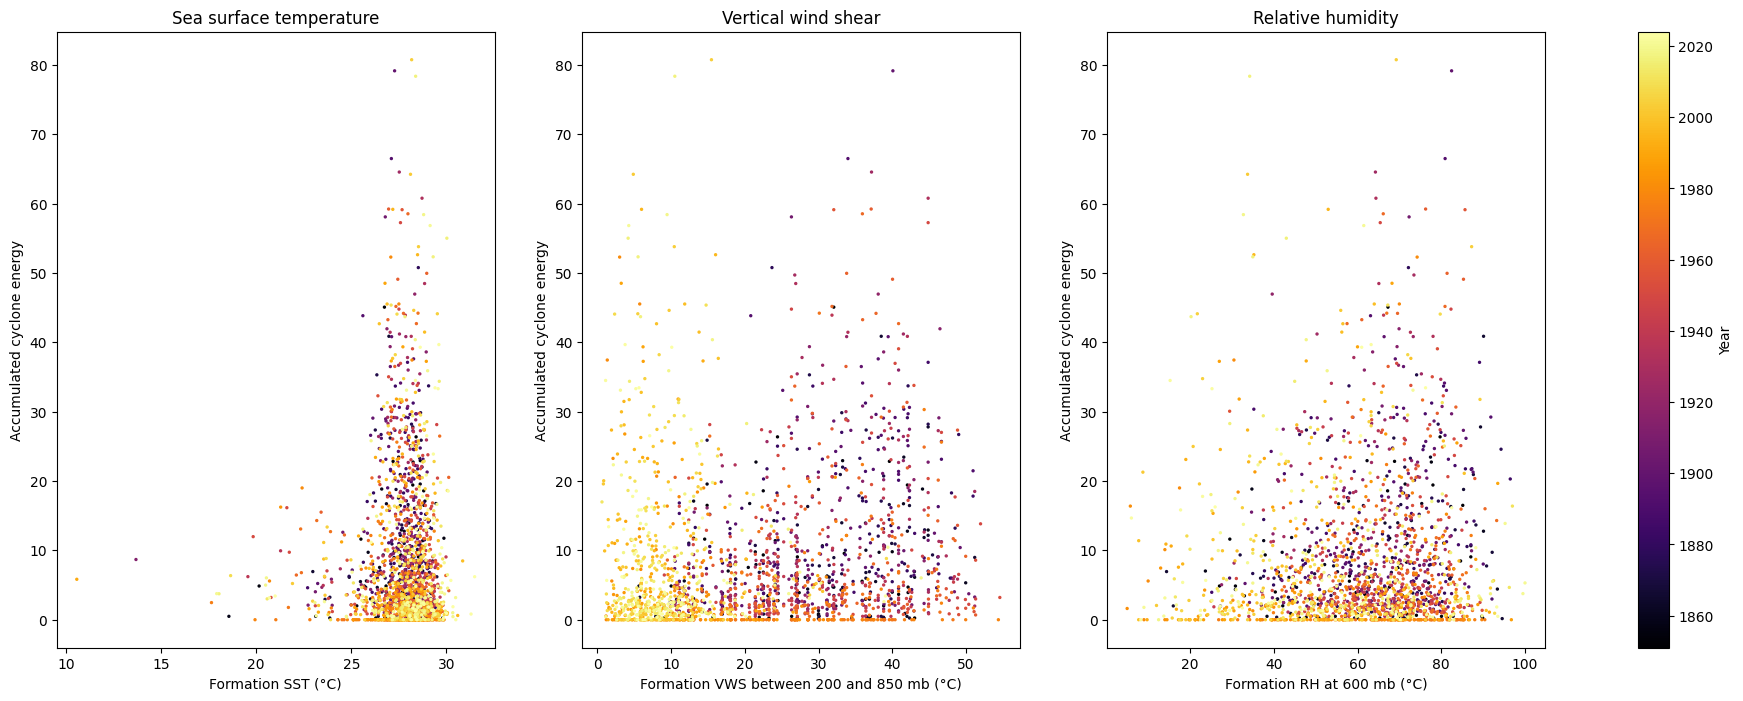

In [41]:
y = df['ACE']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8*3, 8))
sc1=ax[0].scatter(df['sst_minus_0_days'],y,s=2,c=df['year'], cmap='inferno')
ax[0].set_ylabel("Accumulated cyclone energy")
ax[0].set_xlabel("Formation SST (°C)")
ax[0].set_title("Sea surface temperature")

ax[1].scatter(df['vws_minus_0_days'],y,s=2,c=df['year'], cmap='inferno')
ax[1].set_ylabel("Accumulated cyclone energy")
ax[1].set_xlabel("Formation VWS between 200 and 850 mb (°C)")
ax[1].set_title("Vertical wind shear")

ax[2].scatter(df['rhum_minus_0_days'],y,s=2,c=df['year'], cmap='inferno')
ax[2].set_ylabel("Accumulated cyclone energy")
ax[2].set_xlabel("Formation RH at 600 mb (°C)")
ax[2].set_title("Relative humidity")
fig.colorbar(sc1, ax=ax, label="Year")
plt.show()


In [4]:
seasonal = pd.read_csv("data/season-ace.csv")
seasonal.head()

,Year,NamedStorms,NamedStormDays,Hurricanes,HurricaneDays,MajorHurricanes,MajorHurricaneDays,AccumulatedCycloneEnergy
0,1851,6,23.75,3,7.50,1,1.00,36.2
1,1852,5,33.25,5,23.50,1,2.50,73.3
2,1853,8,25.00,4,20.50,2,9.25,76.5
3,1854,5,14.50,3,7.25,1,2.00,31.0
4,1855,5,8.50,4,4.00,1,1.00,18.1


In [7]:
seasonal['sin_year'] = np.sin(seasonal.Year)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = seasonal[['Year','sin_year']]
y = seasonal['AccumulatedCycloneEnergy']
model.fit(X, y)
b0 = model.intercept_
b1, b2 = model.coef_
x_pts = np.linspace(1851,2025,200)
y_pts = b0 + b1*x_pts + b2*np.sin(x_pts)

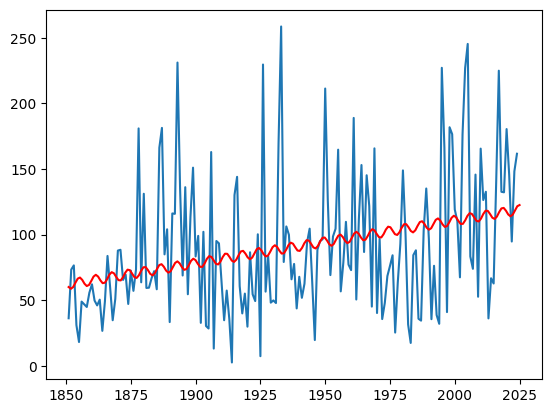

In [14]:
plt.plot(seasonal.Year, seasonal.AccumulatedCycloneEnergy)
plt.plot(x_pts, y_pts,color='r')
plt.show()